## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 04 : Linear Discriminant Analysis </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Nisa'ul Fadhilah"
myNIM = "00000060236"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Start: 		2023-09-21 20:21:47.178580
Device ID: 	d0c6e74d-5881-11ee-a39f-2c3b70a37f3c



---

### Dataset yang dipakai:

1. Breast_Cancer.csv – sumber : https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
2. [Nama dataset2] – sumber : [cantumkan link dataset2]

---

### Hasil kerja

#### Importing system library

In [20]:
import sys

#### Importing numpy library

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df = df.drop(["RowNumber", "CustomerId", "Surname", "Geography", "Gender", "Balance"], axis=1)
df


,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,1,1,1,101348.88,1
1,608,41,1,1,0,1,112542.58,0
2,502,42,8,3,1,0,113931.57,1
3,699,39,1,2,0,0,93826.63,0
4,850,43,2,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,771,39,5,2,1,0,96270.64,0
9996,516,35,10,1,1,1,101699.77,0
9997,709,36,7,1,0,1,42085.58,1
9998,772,42,3,2,1,0,92888.52,1


In [24]:
X = df.iloc[:, :3].values
Y = df.iloc[:, 3].values


In [25]:
# spliting the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [26]:

df


,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,1,1,1,101348.88,1
1,608,41,1,1,0,1,112542.58,0
2,502,42,8,3,1,0,113931.57,1
3,699,39,1,2,0,0,93826.63,0
4,850,43,2,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,771,39,5,2,1,0,96270.64,0
9996,516,35,10,1,1,1,101699.77,0
9997,709,36,7,1,0,1,42085.58,1
9998,772,42,3,2,1,0,92888.52,1


In [27]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [28]:
# import LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [29]:
# initialize the LDA
lda = LDA(n_components = 2)

In [30]:
# fitting the LDA model
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)

In [31]:
# import the Logistic Regression model from sklearn using the 2 variances with the help of LDA
from sklearn.linear_model import LogisticRegression


In [32]:
LG=LogisticRegression(random_state=0)

In [33]:
# fit the Logistic Regression model
LG.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [34]:
# predict the Logistic regression model
y_pred=LG.predict(X_test)


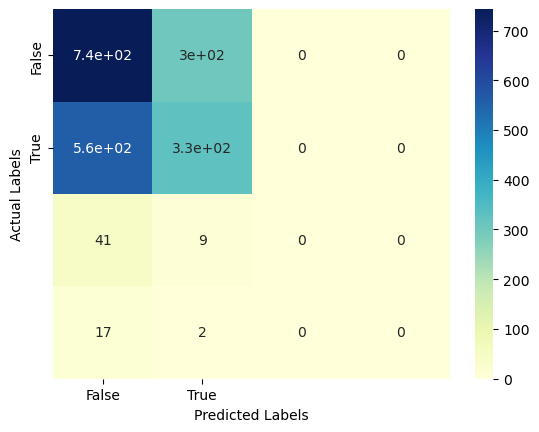

In [35]:
# Import library yang diperlukan
import seaborn as sns
import matplotlib.pyplot as plt
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
# Menampilkan heatmap dengan label "True" dan "False"
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", xticklabels=["False", "True"], yticklabels=["False", "True"])
# Menambahkan label sumbu x dan y
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
# Menampilkan plot
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_14464\407532418.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


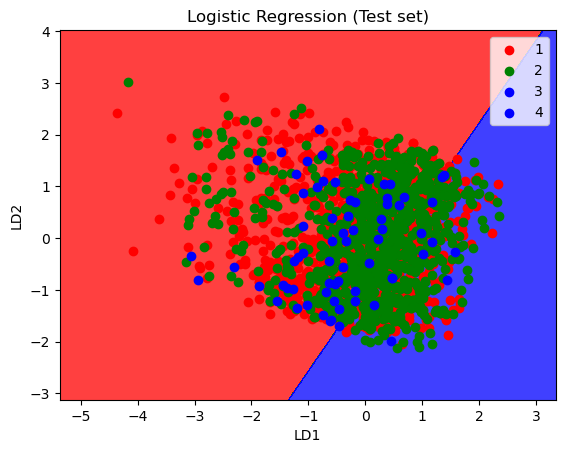

In [36]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LG.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - terdapat beberapa jenis kesalahan dalam klasifikasi data, yaitu data yang sebenarnya benar tetapi terdeteksi sebagai   salah, dan sebaliknya. Jumlah data yang sebenarnya benar tetapi terdeteksi sebagai salah sebanyak 560, sedangkan data   yang salah dan terdeteksi sebagai salah sebanyak 740. Di sisi lain, data yang sebenarnya benar dan terdeteksi sebagai   benar ada sebanyak 330, dan yang salah namun terdeteksi sebagai benar sebanyak 300.
    
    - disimpulkan  bahwa dataset ini tidak memiliki kualitas yang baik karena jumlah data yang salah lebih banyak daripada  data yang benar.
    
    - terdapat tiga jenis warna dalam kolormap, yaitu merah, hijau, dan biru, namun hasil dari analisis logistik regresi    menunjukkan bahwa ada empat variasi data logistic regression, dengan satu titik berwarna merah, satu titik berwarna      hijau, dan dua titik berwarna biru.
    
    - berdasarkan hasil dari analisis logistik regresi, kita menemukan bahwa daerah logistik dengan warna merah memiliki    pengaruh paling dominan atau cakupan paling besar.

---

In [20]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Nisa'ul Fadhilah
NIM: 		00000060236
Time-stamp:	2023-09-21 15:38:18.775924


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [37]:
!jupyter nbconvert --to html "./IF540L_Kelas_EL_laporan_M04_00000060236_Nisaul Fadhilah.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_EL_laporan_M04_00000060236_Nisaul Fadhilah.ipynb to html
[NbConvertApp] Writing 734500 bytes to IF540L_Kelas_EL_laporan_M04_00000060236_Nisaul Fadhilah.html
